In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load data

In [413]:

dfs=pd.read_csv('HAR_Test.csv') 


In [414]:
df=pd.read_csv('HAR.csv')


In [416]:
dfs.head()

,label,timeElapsed,x,y,z
0,Jogging,0,-0.694638,12.680544,0.503953
1,Jogging,1,5.012288,11.264028,0.953424
2,Jogging,2,4.903325,10.882658,-0.081722
3,Jogging,3,-0.612916,18.496431,3.023717
4,Jogging,4,-1.184970,12.108489,7.205164


Dataset for TRaining **Durting train uncomment**

Dataset for Testing **Durting train comment**

In [417]:
df.head()

,timeElapsed,x,y,z,label
0,0.0,0.141495,1.025558,0.085266,Standing
1,1.0,0.155807,1.030487,0.090134,Standing
2,2.0,0.161728,1.031693,0.098663,Standing
3,3.0,0.160599,1.019730,0.097275,Standing
4,4.0,0.162506,0.987411,0.105499,Standing


In [350]:
df.shape

(1457, 5)

In [390]:
df['label'].unique()

array(['stand', 'walk', 'stairDown', 'stairUp'], dtype=object)

## Plot Axies of Accelerometer Dataset 

KeyError: 'timeElapsed'

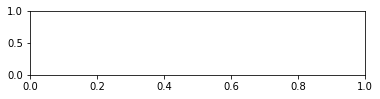

In [391]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [418]:
X_acc=df['x'].values
Y_acc=df['y'].values
Z_acc=df['z'].values
X_accs=dfs['x'].values
Y_accs=dfs['y'].values
Z_accs=dfs['z'].values

In [393]:
from scipy.signal import butter,filtfilt
# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [394]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [419]:
X_filtered = butter_lowpass_filter(X_acc, cutoff, fs, order)
Y_filtered = butter_lowpass_filter(Y_acc, cutoff, fs, order)
Z_filtered = butter_lowpass_filter(Z_acc, cutoff, fs, order)
X_filtereds = butter_lowpass_filter(X_accs, cutoff, fs, order)
Y_filtereds = butter_lowpass_filter(Y_accs, cutoff, fs, order)
Z_filtereds = butter_lowpass_filter(Z_accs, cutoff, fs, order)

In [122]:
def Filter (Data):
        a=0.05  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [123]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

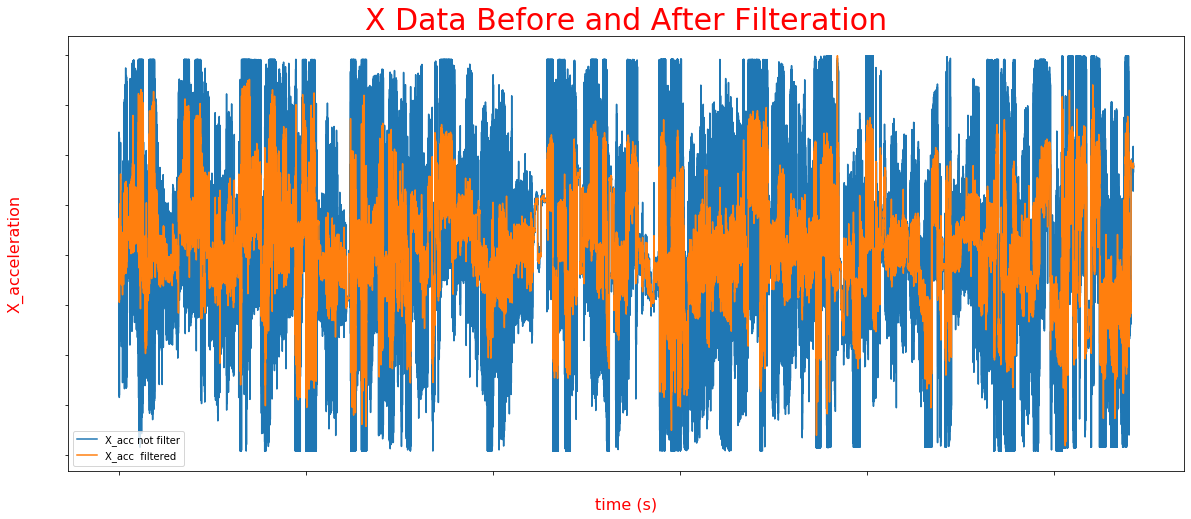

In [210]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('X_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


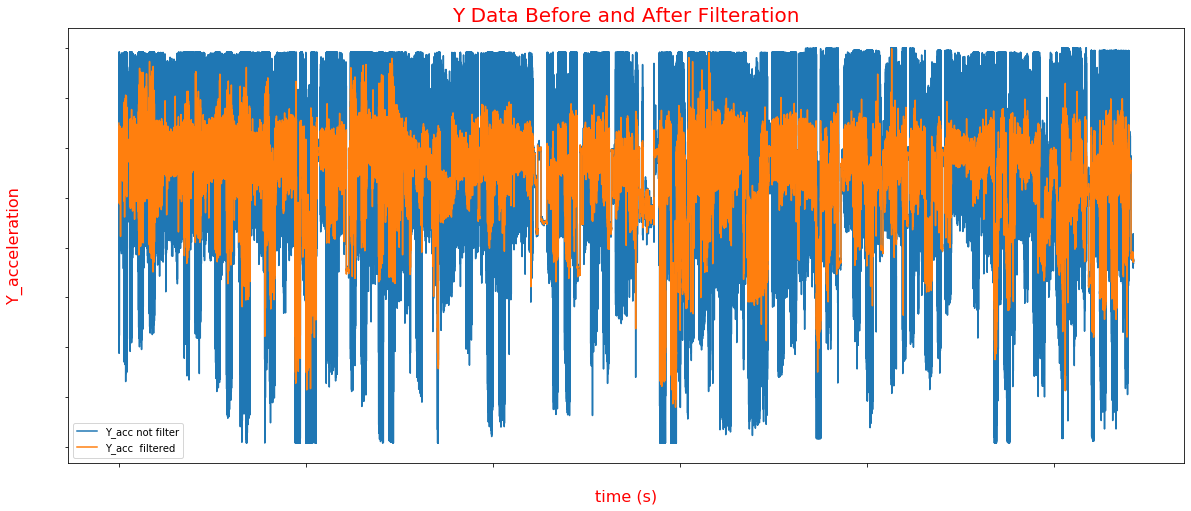

In [211]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='red',fontsize=20)
plt.ylabel('Y_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()

plt.show()

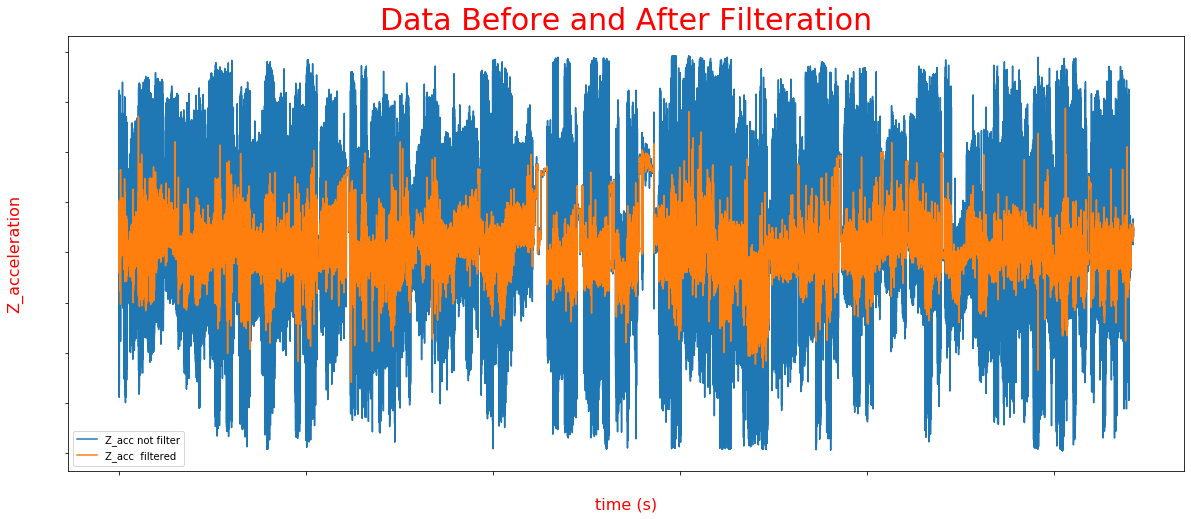

In [212]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('Z_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [420]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 6)
Y_smoothed = gaussian_filter1d(Y_filtered, 6)
Z_smoothed = gaussian_filter1d(Z_filtered, 6)
X_smootheds = gaussian_filter1d(X_filtereds, 6)
Y_smootheds = gaussian_filter1d(Y_filtereds, 6)
Z_smootheds = gaussian_filter1d(Z_filtereds, 6)

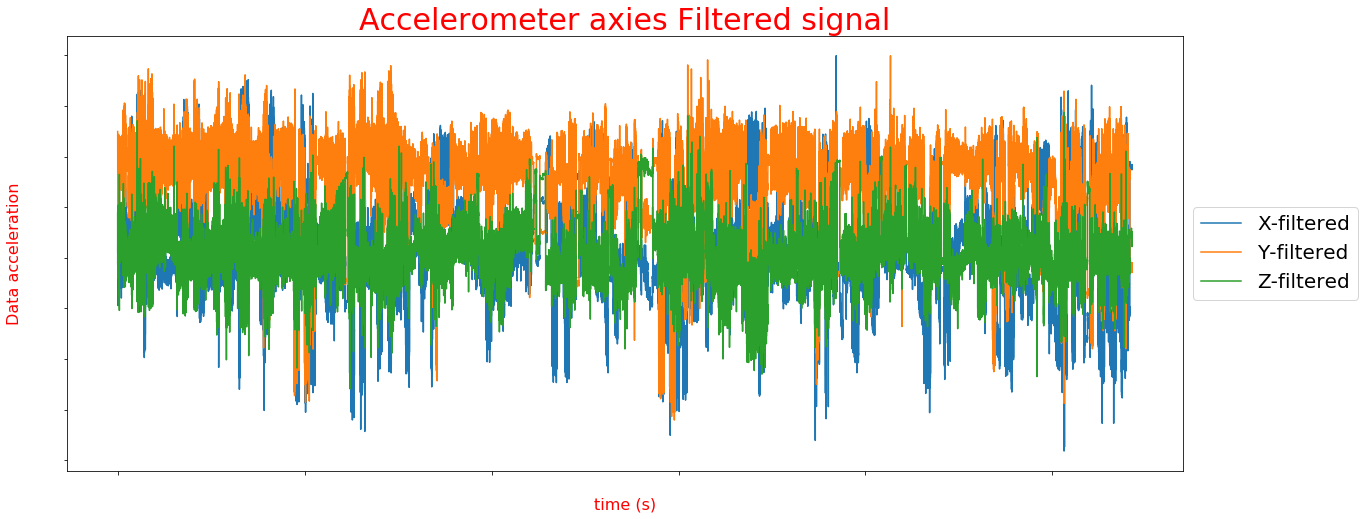

In [214]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

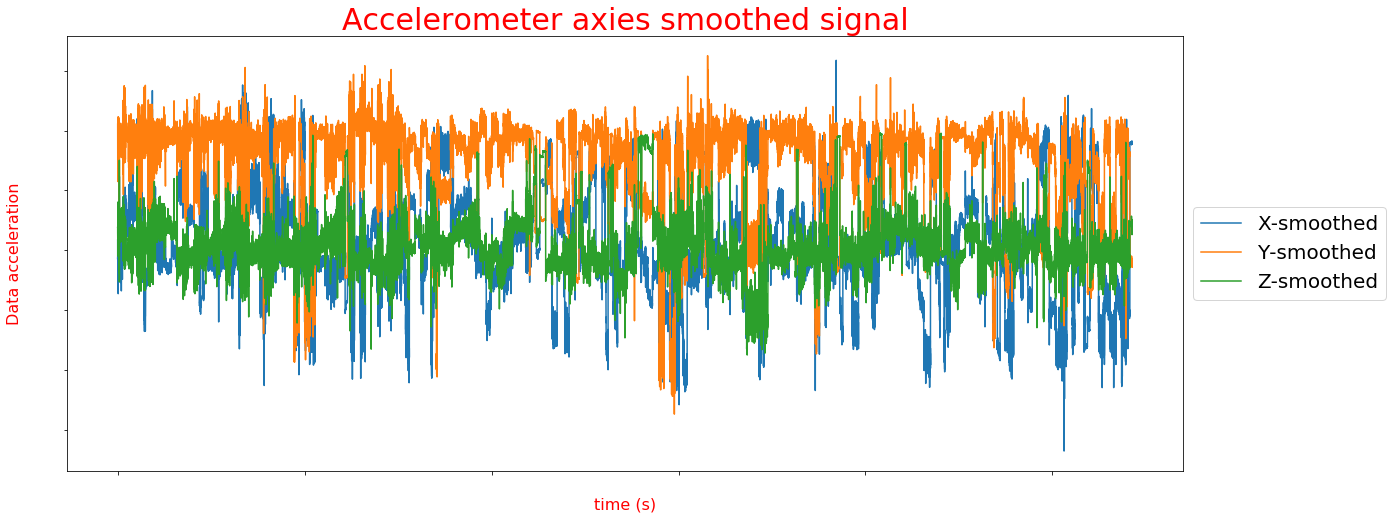

In [215]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

In [433]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()
X_smoothed_scaler=mn.fit_transform(np.array(X_smoothed).reshape(-1,1))
y_smoothed_scaler=mn.transform(np.array(Y_smoothed).reshape(-1,1))
z_smoothed_scaler=mn.transform(np.array(Z_smoothed).reshape(-1,1))
X_smoothed_scalers=mn.transform(np.array(X_smootheds).reshape(-1,1))
y_smoothed_scalers=mn.transform(np.array(Y_smootheds).reshape(-1,1))
z_smoothed_scalers=mn.transform(np.array(Z_smootheds).reshape(-1,1))

In [434]:
df['x_scaler']=X_smoothed_scaler
df['y_scaler']=y_smoothed_scaler
df['z_scaler']=z_smoothed_scaler
dfs['x_scaler']=X_smoothed_scalers
dfs['y_scaler']=y_smoothed_scalers
dfs['z_scaler']=z_smoothed_scalers

In [435]:
df[df['label']=='Jogging'].head()

,timeElapsed,x,y,z,label,x_scaler,y_scaler,z_scaler
656953,656953.0,0.533203,2.243454,0.436127,Jogging,-0.988022,2.862063,0.951939
656954,656954.0,-0.611053,4.284424,-2.440475,Jogging,-0.787442,3.013621,0.807050
656955,656955.0,-1.465057,1.312225,1.023117,Jogging,-0.573865,3.144095,0.650241
656956,656956.0,-0.450760,0.076752,0.908340,Jogging,-0.352103,3.249951,0.483210
656957,656957.0,-0.054520,-0.101074,0.981995,Jogging,-0.127897,3.329127,0.308615


In [436]:
dfs.head()

,label,timeElapsed,x,y,z,x_scaler,y_scaler,z_scaler
0,Jogging,0,-0.694638,12.680544,0.503953,-2.093032,31.464715,5.695172
1,Jogging,1,5.012288,11.264028,0.953424,-2.120904,31.319624,5.710453
2,Jogging,2,4.903325,10.882658,-0.081722,-2.171715,31.036114,5.735257
3,Jogging,3,-0.612916,18.496431,3.023717,-2.236139,30.627003,5.758955
4,Jogging,4,-1.184970,12.108489,7.205164,-2.301489,30.110280,5.767698


In [399]:
x_list = []
y_list = []
z_list = []
train_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, df.shape[0] - window_size, step_size):
    xs = df['x_scaler'].values[i: i + 100]
    ys = df['y_scaler'].values[i: i + 100]
    zs = df['z_scaler'].values[i: i + 100]
    label = stats.mode(df['label'][i: i + 100])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

In [400]:
X_train.shape

(28, 50)

In [296]:
# # converting the signals from time domain to frequency domain using FFT
# x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
# y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
# z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# # Statistical Features on raw x, y and z in frequency domain
# # FFT mean
# X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
# X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
# X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# # FFT std dev
# X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
# X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
# X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# # FFT avg absolute diff
# X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
# X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
# X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# # FFT min
# X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
# X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
# X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# # FFT max
# X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
# X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
# X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# # FFT max-min diff
# X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
# X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
# X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# # FFT median
# X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
# X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
# X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# # FFT median abs dev 
# X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
# X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
# X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# # FFT Interquartile range
# X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
# X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
# X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# # FFT values above mean
# X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
# X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
# X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# # FFT number of peaks
# X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
# X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
# X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# # FFT skewness
# X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
# X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
# X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# # FFT kurtosis
# X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
# X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
# X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# # FFT energy
# X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/50)
# X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/50)
# X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/50))

# # FFT avg resultant
# X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# # FFT Signal magnitude area
# X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
#                      + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/50))

In [401]:
df_New=X_train


In [402]:
X=X_train
y=np.array(train_labels)

In [403]:
X.shape

(28, 50)

In [404]:
y.shape

(28,)

# Classification Phase

> **You Can Comment and Uncomment using ( ctrl + / ) **

> **You Can found this  /   in numpad idot  :D**

### Splitting data to train and test

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=49)

During train uncomment this cell

In [405]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (28, 50)
X_test_shape ----> (8622, 50)
Y_train_shape ----> (20116,)
Y_test_shape ----> (8622,)


During train uncomment this cell

### Preprocessimg label data and feature

In [406]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# y_labeled=le.fit_transform(y_train)
# y_labeled_test=le.transform(y_test)
# Y_all=le.transform(y)
y_independent=le.fit_transform(y)
y_independent.shape

(28,)

In [407]:
z=le.inverse_transform(np.unique(y_independent))


In [408]:
z

array(['stairDown', 'stairUp', 'stand', 'walk'], dtype='<U9')

During train uncomment this line and change y to y_train

In [409]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# x_Scaler_train=sc.fit_transform(X_train)
# x_Scaler_test=sc.transform(X_test)
# X_all=sc.transform(X)
x_independent=sc.fit_transform(X)
x_independent.shape

(28, 50)

During train uncomment this line and change X to X_train

### Using Support vector machine Classification

In [332]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , X_all , Y_all, cv = 3)
print("Cross validation for train data SVC is : ", cv_svm_train.mean())




Cross validation for train data SVC is :  0.9023597454214206


During train uncomment this cell

Confusion matrix is :
  [[ 636   13    3    1   58   82]
 [  16  791    3    0    9    8]
 [   0    0 2029    0    4    0]
 [   0    0    4 1900    0    0]
 [  55    6    3    2  814   99]
 [  19    2    3    7   40 2015]]


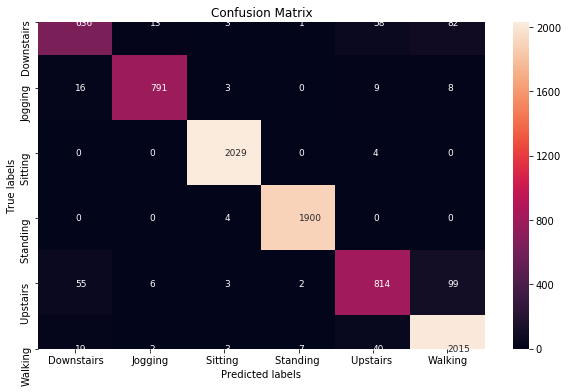

In [333]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



During train uncomment this cell

### Using KNN Classification

In [334]:
# acc = []
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
# for i in range(1,40):
#     neigh = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski',p=1).fit(x_Scaler_train, y_labeled)
#     yhat = neigh.predict(x_Scaler_test)
#     acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
# print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [335]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN ,  X_all , Y_all, cv = 3)
print("Cross validation for train data KNN is : ", cv_knn_train.mean())
# cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data KNN is : ", cv_knn_test.mean())


Cross validation for train data KNN is :  0.905143340479707


During train uncomment this cell

Confusion matrix is :
  [[ 703    8    0    1   30   51]
 [  23  792    0    0    6    6]
 [   1    2 2026    0    4    0]
 [   1    0    1 1901    0    1]
 [  48   15    1    2  880   33]
 [  27    5    1    5   21 2027]]


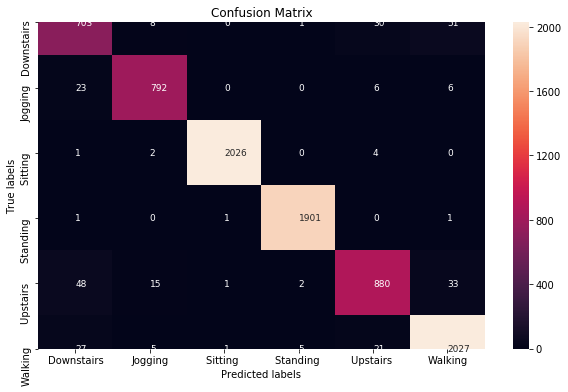

In [336]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_Knn)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



During train uncomment this cell

### Using Random forest Classifier

In [337]:
# acc = []
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# for i in range(1,50):
#     neigh = RandomForestClassifier(n_estimators =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
#     yhat = neigh.predict(x_Scaler_test)
#     acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
# print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [338]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 36, criterion = 'entropy',random_state=49)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , X_all , Y_all, cv = 3)
print("Cross validation for train data RF is : ", cv_rf_train.mean())
# cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data RF is : ", cv_rf_test.mean())



Cross validation for train data RF is :  0.9118592282773519


During train uncomment this cell

Confusion matrix is :
  [[ 682   14    0    1   47   49]
 [  16  797    1    0    8    5]
 [   3    0 2025    0    5    0]
 [   0    0    0 1904    0    0]
 [  26    5    1    1  882   64]
 [  19    0    1    4   30 2032]]


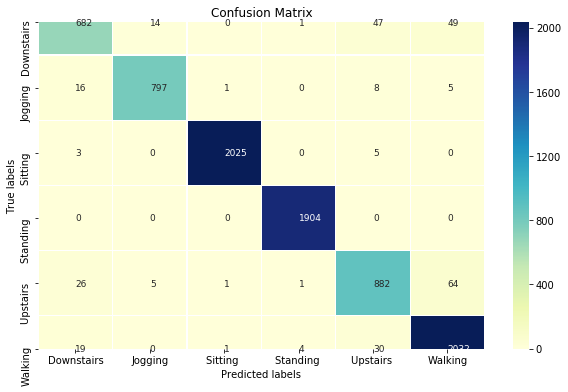

In [339]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_RF)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Decision Tree Classifier

In [340]:
# acc = []
# from sklearn import tree
# from sklearn import metrics
# for i in range(1,50):
#     neigh = tree.DecisionTreeClassifier(max_depth  =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
#     yhat = neigh.predict(x_Scaler_test)
#     acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
# print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [341]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = 11,criterion = 'entropy',random_state=49)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT ,  X_all , Y_all, cv = 3)
print("Cross validation for train data DT is : ", cv_dt_train.mean())
# cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data DT is : ", cv_dt_test.mean())


Cross validation for train data DT is :  0.8714942830099158


During train uncomment this cell

Confusion matrix is :
  [[ 572   36    0    2  101   82]
 [  27  772    0    0   22    6]
 [   2    0 2025    2    4    0]
 [   1    0    0 1903    0    0]
 [  94   22    0    1  738  124]
 [  43    3    0    1   73 1966]]


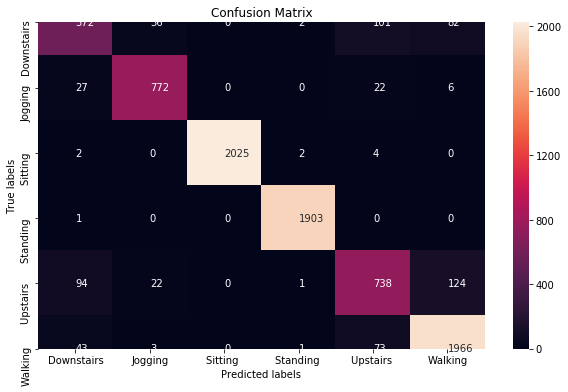

In [342]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

cm = confusion_matrix(y_labeled_test, y_pred_DT)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 10}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Navie Bayes Classifier

In [343]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB ,  X_all , Y_all, cv = 3)
print("Cross validation for train data NB is : ", cv_nv_train.mean())



Cross validation for train data NB is :  0.8150894153972718


During train uncomment this cell

Confusion matrix is :
  [[ 455   55    5    3   38  237]
 [  84  702    1    0   13   27]
 [   1    1 2012    0   19    0]
 [  36   10   26 1809   23    0]
 [ 147   38    0    0  491  303]
 [ 121   14    0    2   49 1900]]


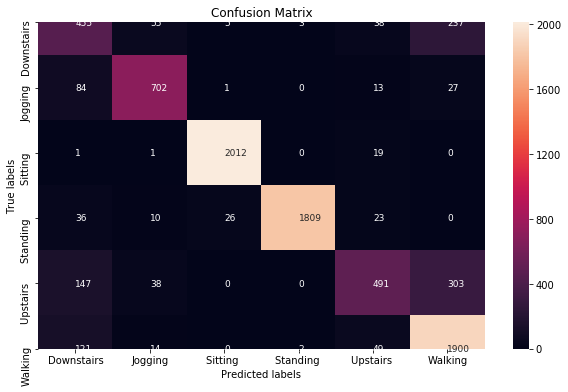

In [344]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_NB)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Showing Accuracy using accuracy_score

In [345]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled_test, y_pred_DT),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled_test, y_pred_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled_test, y_pred_Knn),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled_test, y_pred_NB),2))  

Accuracy of SVC          ---------> 0.95
Accuracy of Desicion Tree---------> 0.93
Accuracy of Random forest---------> 0.97
Accuracy of KNN          ---------> 0.97
Accuracy of Navie Bayes  ---------> 0.85


In [346]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(classifier_RF, 'RandomForest.pkl')
joblib.dump(classifier_NB, 'naviebayes.pkl')
joblib.dump(classifier_DT, 'descisiontree.pkl')
joblib.dump(classifier_SVC, 'svc.pkl')
joblib.dump(classifier_KNN, 'knn.pkl')


['knn.pkl']

In [410]:
# Load the model from the file
import joblib
rf_from_joblib = joblib.load('RandomForest.pkl')
nb_from_joblib = joblib.load('naviebayes.pkl')
dt_from_joblib = joblib.load('descisiontree.pkl')
svc_from_joblib = joblib.load('svc.pkl')
knn_from_joblib = joblib.load('knn.pkl')
y_prediction_test_SVC=svc_from_joblib.predict(x_independent)
y_prediction_test_KNN=knn_from_joblib.predict(x_independent)
y_prediction_test_RF=rf_from_joblib.predict(x_independent)
y_prediction_test_DT=dt_from_joblib.predict(x_independent)
y_prediction_test_NB=nb_from_joblib.predict(x_independent)


During train uncomment this cell

In [382]:
y_prediction_test_SVC=classifier_SVC.predict(x_independent)
y_prediction_test_KNN=classifier_KNN.predict(x_independent)
y_prediction_test_RF=classifier_RF.predict(x_independent)
y_prediction_test_DT=classifier_DT.predict(x_independent)
y_prediction_test_NB=classifier_NB.predict(x_independent)


During train **comment** this cell

In [411]:
from sklearn.metrics import  accuracy_score
print('Accuracy of SVC          --------->',round(accuracy_score(y_independent, y_prediction_test_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_independent, y_prediction_test_KNN),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_independent, y_prediction_test_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_independent, y_prediction_test_DT),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_independent, y_prediction_test_NB),2))

Accuracy of SVC          ---------> 0.11
Accuracy of Desicion Tree---------> 0.11
Accuracy of Random forest---------> 0.04
Accuracy of KNN          ---------> 0.14
Accuracy of Navie Bayes  ---------> 0.14


During train **comment** this cell

Confusion matrix is :
  [[ 1  0  3  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  3  0]
 [10  2  2  0  5]
 [ 0  0  0  0  0]]


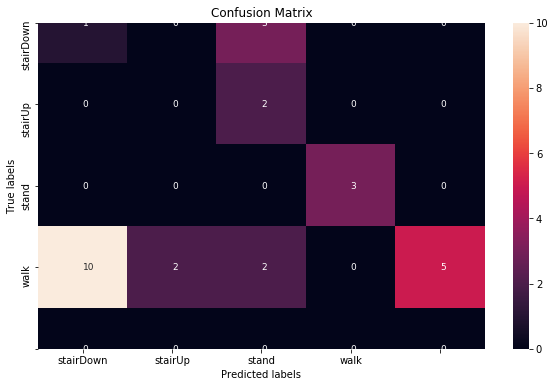

In [412]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_independent, y_prediction_test_RF)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

In [114]:
y_prediction_test_KNN

array([2, 0, 4, 0, 5, 0, 0, 1, 5, 0, 0, 3, 3, 3, 3, 1, 0, 0, 1, 1, 5, 1,
       5, 0, 1, 5, 5, 1, 1, 0, 0, 5, 4, 5, 5, 3, 5, 1, 5, 1, 1, 1, 5, 5,
       1, 1, 1, 5, 5, 2, 0, 1, 0, 5, 5, 5, 4, 4, 1, 1, 0, 5, 5, 0, 4, 0,
       5, 5, 5, 0, 5, 5, 0, 0], dtype=int64)